# 导入库

In [735]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scipy.optimize as opt

# 定义函数

In [736]:
alpha = 1
beta = 30
eps = 0.00000000001
n0 = 1701018

def Economy(n, tax, q):
    return 200.55 * n * (1 + tax) + n * q * np.exp(-0.2 * q) 

def Society(n):
    return 5.0109e-09 * n + 4.2

def Environment(n):
    return 8.15e-6 * n ** 2 - 14.95 * n + 7924000

def count_n(tax, max_n):
    # n =  1701018 * (-3.5 * tax ** 3 + 3.62 * tax ** 2 - 1.22 * tax + 1.1)
    n = n0 * (-5.5 * tax ** 3 + 9.1903 * tax ** 2 - 5.19 * tax + 1.5)
    # print(n)
    return min(n, max_n)

def Objective(x):
    max_n = x[0]
    tax = x[1]
    q = x[2]
    n = count_n(tax, max_n)
    return -(alpha * Economy(n, tax, q) - beta * Environment(n)) / (Society(n) + eps)

# 定义约束范围和初始值

In [737]:
bounds = [(1, None), (0, 0.4), (0, 50)]  # n >= 0, 0 <= tax <= 1, Q >= 0
x0 = [0, 0, 0]

# 不等式限制 count_n >= 1
# cons = ({'type': 'ineq', 'fun': lambda x: x[0] - 1})

# 求最大值

In [738]:
from scipy.optimize import minimize

In [739]:
res = minimize(Objective, x0, bounds=bounds)

In [740]:
print("最小值点：", res.x)
print("最小值：", -res.fun)

print("此时旅游人数为：", count_n(res.x[1], res.x[0]))

最小值点： [1.40799908e+06 2.20814102e-01 5.00005092e+00]
最小值： 59508923.327921756
此时旅游人数为： 1263629.9364378816


# 测试用例

In [741]:
# 穷举alpha和beta的值
# alpha = np.linspace(1, 100, 100)
# beta = np.linspace(1, 100, 100)
# res = {}

# for a in alpha:
#     for b in beta:
#         def Objective(x):
#             max_n = x[0]
#             tax = x[1]
#             q = x[2]
#             n = count_n(tax, max_n)
#             return -(a * Economy(n, tax, q) - b * Environment(n)) / (Society(n) + eps)

#         res[(a, b)] = minimize(Objective, x0, bounds=bounds)

In [742]:
# # 存csv
# tmp = pd.DataFrame(columns=['alpha', 'beta', 'max_n', 'tax', 'q', 'n', 'value'])
# for key, value in res.items():
#     tmp = pd.concat([tmp, pd.DataFrame([{'alpha': key[0], 'beta': key[1], 'max_n': value.x[0], 'tax': value.x[1], 'q': value.x[2], 'n': count_n(value.x[1], value.x[0]), 'value': -value.fun}])], ignore_index=True)

In [743]:
# tmp.to_csv('result.csv', index=False)

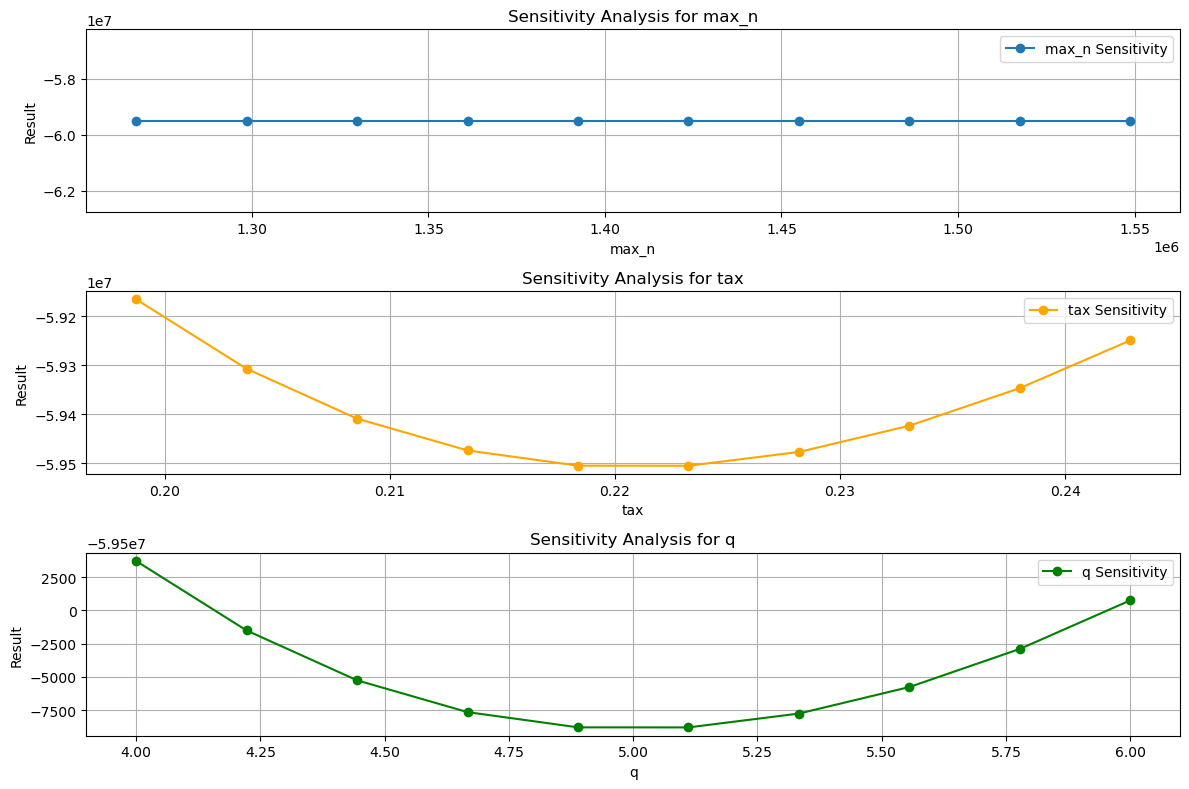

In [744]:
import numpy as np
import matplotlib.pyplot as plt

# 定义模型函数（根据实际模型替换）


# 基准参数
base_max_n = 1407999
base_tax = 0.22081
base_q = 5

# 参数范围设置
max_n_range = np.linspace(base_max_n * 0.9, base_max_n * 1.1, 10)  # ±10%范围
tax_range = np.linspace(base_tax * 0.9, base_tax * 1.1, 10)
q_range = np.linspace(base_q - 1, base_q + 1, 10)

# 分别分析每个参数对结果的影响
# 1. max_n 敏感性分析
results_max_n = [Objective((max_n, base_tax, base_q)) for max_n in max_n_range]
# 2. tax 敏感性分析
results_tax = [Objective((base_max_n, tax, base_q)) for tax in tax_range]
# 3. q 敏感性分析
results_q = [Objective((base_max_n, base_tax, q)) for q in q_range]

# 绘图
plt.figure(figsize=(12, 8))

# max_n 的影响
plt.subplot(3, 1, 1)
plt.plot(max_n_range, results_max_n, marker='o', label='max_n Sensitivity')
plt.xlabel('max_n')
plt.ylabel('Result')
plt.title('Sensitivity Analysis for max_n')
plt.grid()
plt.legend()

# tax 的影响
plt.subplot(3, 1, 2)
plt.plot(tax_range, results_tax, marker='o', color='orange', label='tax Sensitivity')
plt.xlabel('tax')
plt.ylabel('Result')
plt.title('Sensitivity Analysis for tax')
plt.grid()
plt.legend()

# q 的影响
plt.subplot(3, 1, 3)
plt.plot(q_range, results_q, marker='o', color='green', label='q Sensitivity')
plt.xlabel('q')
plt.ylabel('Result')
plt.title('Sensitivity Analysis for q')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
